# Introduction

This worksheet focuses on Neural Networks. You will:

- Implement your own version of a Single Layer Perceptron (SLP) to ensure you understand the details of how it works and compare it with the implementation available in `scikit-learn` to test and validate your solution.
- Use `scikit-learn`'s implementation of Multi-Layer Perceptrons (MLP) for both classification and regression tasks, exploring how to configure and optimise these models.

This is a reasonably long and difficult worksheet, but, hopefully, an interesting one. Try your best at it and don't worry if you don't get it all done. We will be posting the solutions and you can always ask about it in a different lab in future weeks.

**Note**: This is a challenging worksheet, and you might not finish all tasks during the lab. However, it is designed to be engaging, so do as much as you can. Remember that the solutions will be made available.

# 0. Preliminaries
We firstly import NumPy and matplotlib as we will be using these throughout the worksheet. We use a function %matplotlib inline to display plots in the worksheet.

In [80]:
#TODO: import NumPy and matplotlib here
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Single Layer Perceptron  
In this question, we will use a single layer perceptron from `sklearn` to make predictions on the **breast cancer dataset**. This is a classification problem where the aim is to classify instances as either malignant or benign based on 30 features, each representing various characteristics present in the images.

In this question, you will:  
(a) Download the dataset from `sklearn` and store the data and targets in suitable variables.  
(b) Separate your data into a training and test split.  
(c) (Optional) Write your own function to implement Single Layer Perceptron.   
(d) Train a neural network classifier on the training data using the implementation from `sklearn` (`Perceptron`).  
(e) Evaluate the performance of both models on the test data using appropriate metrics (e.g., accuracy, precision).  
(f) Plot the confusion matrix to visualise the performance of your model.

## Part (a)  
Import the package `datasets` from `sklearn` and then load the load_breast_cancer dataset (function is `load_breast_cancer()`). Save the data into a variable `X` and the targets into a variable `Y`.  
Take a look at the data in `X`. How many datapoints are there? How many features does each datapoint have? (Hint: use `np.shape`).  
Take a look at the targets. Is this suitable for a classification algorithm or a regression algorithm?  

In [81]:
#TODO: import suitable packages, load the dataset, and save data and targets into variables X and Y
from sklearn import datasets

cancer = datasets.load_breast_cancer()

X = cancer.data
y = cancer.target

In [82]:
X.shape

(569, 30)

In [83]:
y.shape

(569,)

## Part (b)

Use the function `train_test_split` from `sklearn.model_selection` to split your data into a training set and a held-out test set. Use a test set that is 0.2 of the original dataset. Set the parameter `random_state` to 10 to help with replication.

In [84]:
# TODO: import the package train_test_split from sklearn.model_selection.
from sklearn.model_selection import train_test_split 
# Split the dataset into Xtr, Xtest, Ytr, Ytest
Xtr, Xtest, Ytr, Ytest= train_test_split(X, y, test_size=0.2)

In [85]:
Xtest.shape

(114, 30)

## (Optional) Part (c)  
Recall from the lecture that a single-layer perceptron runs as follows:  

**Training step**:  
- For each training datapoint $(\vec{x}_i)$:  
  - Compute the linear combination $(z = \vec{w} \cdot \vec{x}_i + b)$.  
  - Pass \(z\) through the activation function (step function in this case) to get the predicted class $(y_{\text{pred}})$.  
  - Compute the error as $(e = y_i - y_{\text{pred}})$, where $(y_i)$ is the true label.  
  - Update the weights and bias using the perceptron learning rule:  
    $[
    \vec{w} \gets \vec{w} + \eta \cdot e \cdot \vec{x}_i  
    ]  
    [
    b \gets b + \eta \cdot e
    ]$  
  Here, $(\eta)$ is the learning rate.  

**Prediction step**:  
- For a given datapoint $(\vec{x})$:  
  - Compute the linear combination $(z = \vec{w} \cdot \vec{x} + b)$.  
  - Pass $(z)$ through the step function to obtain the class prediction.  

Write function(s) to implement the training and prediction steps. Y

In [86]:
class SingleLayerPerceptron:
    def __init__(self, input_size, learning_rate, iterat):
        #TODO# initialise the weights to random values and set the bias to 0
        self.weights = np.random.rand(input_size) #(HINT: use np.random.rand())
        self.bias = 0   
        self.learning_rate = learning_rate
        self.iterat = iterat

    def activation(self, z):
        #TODO # Write a function to implement the **step activation function**. This activation function should output return 1 if z >= 0, else 0
        return np.where(z>0, 1, 0)
   
    def train(self, X, y):
        for epoch in range(self.iterat):
            for i in range(X.shape[0]):
                # Calculate the linear combination
                z = np.dot(X[i], self.weights) + self.bias
                y_pred = self.activation(z)
                #TODO# Calculate error between target and predicted values
                error = y[i] - y_pred
                #TODO# update the weights and bias according to the above equations
                self.weights += self.learning_rate * X[i] * error
                self.bias += self.learning_rate * error 

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)
#Train the perceptron
input_size = Xtr.shape[1] # To pass the number of features 
perceptron1 = SingleLayerPerceptron(input_size=input_size, learning_rate=0.01, iterat=10)

##TODO##  #Train the perceptron with the Train data
perceptron1.train(Xtr, Ytr)

#Test the perceptron
my_Ypred = perceptron1.predict(Xtest)
my_Ypred.shape

(114,)

## Perceptron in scikit-learn

The `Perceptron` class in `scikit-learn` provides an implementation of the single-layer perceptron algorithm, modified to handle both binary and multi-class classification tasks. 
- **Activation Function**: Applies a step activation function, outputting class labels based on the linear combination of inputs and weights.  


## Part (d)  
Now we can compare your implementation with the `sklearn` implementation. Firstly, import the classifier `Perceptron` from `sklearn.linear_model`. Specify relevant hyperparameters such as the learning rate and maximum iterations (same as in the model above). Fit the model on the training data and make predictions on the test set.  

In [87]:
# import the classifier Perceptron from sklearn.linear_model.
from sklearn.linear_model import Perceptron

# Instantiate the Perceptron classifier with learning rate (eta) and max_iterations same as above. 
perceptron2 = Perceptron(
    max_iter=10,    # Maximum number of iterations 
    eta0=0.01,        # Learning rate
    verbose=1  
)

# Train the Perceptron on the training data
perceptron2.fit(Xtr, Ytr)

# Test the Perceptron
Y_pred = perceptron2.predict(Xtest)

-- Epoch 1
Norm: 62.66, NNZs: 30, Bias: 0.580000, T: 455, Avg. loss: 1851.367144
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 91.61, NNZs: 30, Bias: 0.950000, T: 910, Avg. loss: 1167.471197
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 108.40, NNZs: 30, Bias: 1.240000, T: 1365, Avg. loss: 1127.468349
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 122.38, NNZs: 30, Bias: 1.420000, T: 1820, Avg. loss: 847.183545
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 140.17, NNZs: 30, Bias: 1.670000, T: 2275, Avg. loss: 796.361658
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 152.90, NNZs: 30, Bias: 1.830000, T: 2730, Avg. loss: 759.992869
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 167.39, NNZs: 30, Bias: 2.070000, T: 3185, Avg. loss: 839.189478
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 176.73, NNZs: 30, Bias: 2.200000, T: 3640, Avg. loss: 784.690331
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 179.35, NNZs: 30, Bias: 2.280000, T: 4095, Avg. 

c:\Users\Ha Tung Lam\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


## Part (e) (Optional) 
Use the built in metrics in sklearn to calculate the accuracy of your classifier on the Testing set. Compare the accuracy of the `sklearn` implementation with your custom implementation. 

In [88]:
from sklearn.metrics import accuracy_score

##TODO## Write your answer here
#Evaluate the accuracy

my_acc = accuracy_score(Ytest, my_Ypred)
sk_acc = accuracy_score(Ytest, Y_pred)

print(my_acc, sk_acc)

0.8333333333333334 0.8947368421052632


## Part(f) 
Plot the confusion matrix to visualise the performance of your model.

In [89]:
from sklearn.metrics import classification_report, confusion_matrix
##TODO## Write your answer here
cm = confusion_matrix(Ytest, my_Ypred)
cm

array([[44,  1],
       [18, 51]], dtype=int64)

If the accuracy is low, consider increasing the maximum number of iterations and repeating the fitting and testing process.

# 2. Multilayer Perceptron
 <img src="attachment:82da26eb-a283-4bb4-a5a3-264c06e568b5.png" width="400"/>

The input layer, located on the far left, contains neurons that correspond to the input features. Each neuron in the hidden layer processes the values from the previous layer through a weighted sum, which is then passed through a non-linear activation function, such as `ReLU`. Finally, the output layer takes the values from the last hidden layer and converts them into the model’s output.

## Pre-Written Functions in scikit-learn for MLP Classification and Regression

`scikit-learn` provides pre-written implementations for neural network models through the `MLPClassifier` and `MLPRegressor` classes.
- The `MLPClassifier` and `MLPRegressor` automatically select the appropriate configurations (e.g., loss functions and output functions) based on the problem type.
- Users can modify hyperparameters (e.g., `hidden_layer_sizes`, `activation`, `max_iter`, etc) to tune the model for specific tasks.
- **Note**: In other machine learning libraries, you may need to manually set the loss function and output function, as they are not always configured automatically.

# 2.1. Multi-class Classification using Multilayer Perceptron

Now that we’ve compared how your Perceptron model performs against the `sklearn` Perceptron for binary classification, we’ll explore a multiclass classification problem using the `load_digits` dataset. This dataset involves classifying 8x8 images of handwritten digits (0–9) based on 64 pixel intensity features.

In this task, you will:  
(a) Load the dataset from `sklearn` and store the data and targets.  
(b) Split the data into training and test sets.  
(c) Train a neural network classifier using `MLPClassifier`.  
(d) Evaluate your model’s performance on the test set (e.g., accuracy, precision).  
(e) Modify your hyperparameters.  
(f) (Optional) Plot the loss curve.

## Part (a)  
From `sklearn.datasets` load the load_digits dataset (function is `load_digits()`). Save the data into a variable `X1` and the targets into a variable `Y1`.  
Take a look at the data in `X1`. How many datapoints are there? How many features does each datapoint have? (Hint: use `np.shape`). 
Take a look at the targets. How many classes does the output need to be classified into??  

In [90]:
#TODO#  #Load the dataset
digits= datasets.load_digits()
X1 = digits.data
Y1 = digits.target


Look at the images corresponding to the input. Set the value of the target as the output.

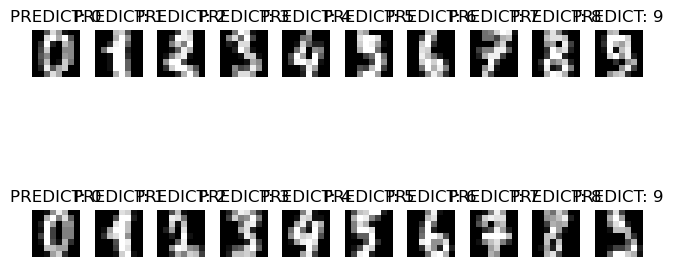

In [91]:
fig, axes = plt.subplots(2, 10)
for i in range(20):
    axes[i//10, i %10].imshow(digits.images[i], cmap='gray');
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title(f"PREDICT: {digits.target[i]}")
    
plt.tight_layout()
plt.show()


## Part (b)  
Split the dataset into training and testing sets

In [92]:
##TODO##
Xtr1, Xtest1, Ytr1, Ytest1= train_test_split(X1, Y1)
Xtr1.shape, Xtest1.shape

((1347, 64), (450, 64))

##  MLPClassifier from `sklearn.neural_network`
- Designed for classification tasks 
- Uses `log-loss` (also called cross-entropy loss function) by default.
- outputs probabilities for each class by default using the **softmax** activation function.

## Part (c)
Import `MLPClassifier` from `sklearn.neural_network`.After importing, check the default parameters of the `MLPClassifier` model.

Create an instance of the `MLPClassifier` with the following settings:
- 2 hidden layers, each with 10 neurons.
- activation set as ReLU  
- Set the maximum number of iterations (`max_iter`) to 10.
- 
Train the model using the training data (`Xtr1`,`Ytr1`)

In [93]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(32, 16, 8),  
    activation='relu',   
    learning_rate_init=0.01,
    max_iter=20, 
    verbose=2
)


##TODO## Train the MLPClassifier on the training data
##TODO##
mlp_classifier.fit(Xtr1, Ytr1)


Iteration 1, loss = 2.25180106
Iteration 2, loss = 1.83344135
Iteration 3, loss = 1.59070775
Iteration 4, loss = 1.42061284
Iteration 5, loss = 1.29510796
Iteration 6, loss = 1.17838499
Iteration 7, loss = 1.03905281
Iteration 8, loss = 0.86582020
Iteration 9, loss = 0.67319147
Iteration 10, loss = 0.52857167
Iteration 11, loss = 0.38372266
Iteration 12, loss = 0.27531882
Iteration 13, loss = 0.23433213
Iteration 14, loss = 0.17198453
Iteration 15, loss = 0.14609334
Iteration 16, loss = 0.13077660
Iteration 17, loss = 0.10008270
Iteration 18, loss = 0.08099082
Iteration 19, loss = 0.06995165
Iteration 20, loss = 0.06548047


c:\Users\Ha Tung Lam\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(32, 16, 8), learning_rate_init=0.01,
              max_iter=20, verbose=2)

## Part (d)
Make predictions on the test set.
Measure accuracy using sklearn_metrics

In [94]:
##TODO##
y_pred_mlp1 = mlp_classifier.predict(Xtest1)
accuracy_mlp1 = accuracy_score(Ytest1, y_pred_mlp1)
accuracy_mlp1

0.9244444444444444

Visualize a sample of images and their predictions for MLP. Check if it is correct.

## Part (e)
Experiment with Hidden Layer Configurations
This neural network currently has 2 hidden layers, each with 10 neurons (`hidden_layer_sizes=(10,10)`). The parameter `hidden_layer_sizes=(x, y, ...)` specifies the number of neurons in each layer.

- Try experimenting with different configurations of hidden layers (e.g., fewer or more layers, or varying the number of neurons per layer) to observe their effect on the model's performance.
- Does increasing the number of layers or neurons always improve the performance? Why or why not?

Investigate the Parameter `activation`
Explore the parameter `activation` in the `MLPClassifier` model. 

- What are the different activation functions available (e.g., `relu`, `tanh`, `logistic`)?
- Change the activation function and observe how it impacts the model's performance.

Investigate the Parameter `learning_rate_init`
- Explore the parameter `activation` in the `MLPRegressor` or `MLPClassifier` model. 
- What does increasing or decreasing the value of learning_rate result in?

## Part (f) (Optional)
Plot the loss curve (progression of the loss during training)
Access the model's loss curve to visualise the progression of the loss during training.
- Use the `loss_curve_` attribute of the trained model to retrieve the loss values for each iteration.

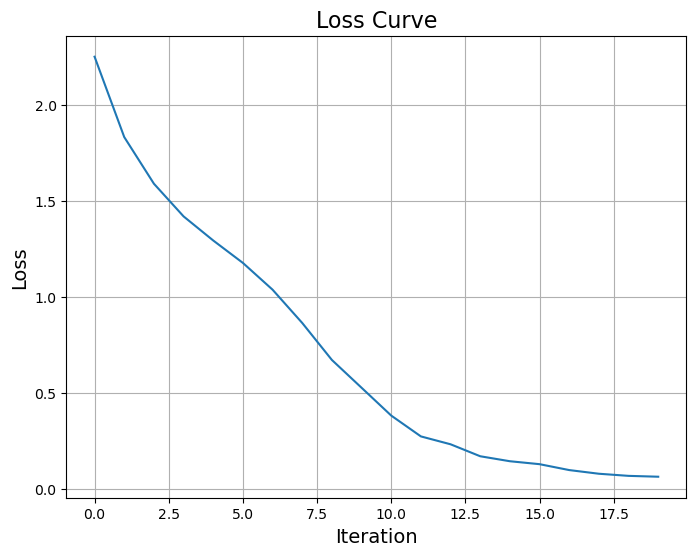

In [95]:
##TODO##
##TODO##
plt.figure(figsize=(8, 6))
plt.plot(mlp_classifier.loss_curve_)
plt.title("Loss Curve", fontsize=16)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.grid(True)
plt.show()

# 2.2.  Regression using Multilayer Perceptron
Now, we’ll perform a regression task using a Multilayer Perceptron on the `load_diabetes` dataset. This dataset involves predicting a continuous target variable related to diabetes progression based on 10 numerical features.  

In this task, you will:  
(a) Load the dataset using the `load_diabetes` function from `sklearn.datasets`.  
(b) Split the data into training and test sets.  
(c) Train a neural network regressor using `MLPRegressor`.  
(d) Evaluate your model’s performance on the test set using metrics such as mean squared error (MSE) and R² score.  
(e) Experiment with different hyperparameters to optimise the model's performance.  
(f) (Optional) Plot the predicted vs actual values to visualise the model's accuracy.  
(g) Plot the loss curve

## Part (a)
Load the load_diabetes from sklearn.datasets
Check the X and y of your data
Take a look at the data in `X2` and the target labels in `Y2`. Find their shapes using `.shape`. 
- How many data points are there in `X2`?
- How many features does each data point have?
- Does the data require scaling or normalising before training a neural network model?

In [96]:
#TODO# Load dataset
db = datasets.load_diabetes()
X2 = db.data
Y2 = db.target

## Part (b) 
Split the data into training and testing sets

In [97]:
##TODO## Split dataset
Xtr2, Xtest2, Ytr2, Ytest2 = train_test_split(X2, Y2)

## MLPRegressor from `sklearn.neural_network`
Class MLPRegressor from `sklearn.neural_network` implements a multi-layer perceptron (MLP) that trains using backpropagation with no activation function  in the output layer, which can also be seen as using the identity function as activation function. Therefore, it uses the square error as the loss function, and the output is a set of continuous

## Part (c)
Import the `MLPRegressor` from `sklearn.neural_network`. After importing, check the default parameters of the `MLPRegressor` model.
- What are the default values for parameters such as `hidden_layer_sizes`, `activation`, and `solver`?
- How would you go about changing any of these default parameters for your model?
## Create the instance of the MLPRegressor
Create an instance of the `MLPRegressor` with the following settings:
- 2 hidden layers, each with 10 neurons.
- Set the maximum number of iterations (`max_iter`) to 10.
  
Train the model using the training data (`Xtr2`,`Ytr2`)

In [116]:
#TODO# Import the MLPRegressor from sklearn.neural_network
from sklearn.neural_network import MLPRegressor

# Create the MLP Regressor model
mlp_regression = MLPRegressor(
    hidden_layer_sizes=(64, 32, 8),
    activation= 'relu',
    max_iter= 10
)

##TODO## Train the model
mlp_regression.fit(Xtr2, Ytr2)

c:\Users\Ha Tung Lam\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(64, 32, 8), max_iter=10)

## Part (d)
Make predictions on the test set (`Xtest2`).
Evaluate the model using appropriate metrics from sklearn.metrics.

In [117]:
#TODO## Predict on the test set
Y_pred_mlp2 = mlp_regression.predict(Xtest2)

##TODO##
#import appropriate functions 
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Ytest2, Y_pred_mlp2)
r2 = r2_score(Ytest2, Y_pred_mlp2)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 32335.071632330222
R2 Score: -3.842252105538094


## Part (e)
Experiment with Hidden Layer Configurations
This neural network currently has 2 hidden layers, each with 10 neurons (`hidden_layer_sizes=(10,10)`). The parameter `hidden_layer_sizes=(x, y, ...)` specifies the number of neurons in each layer.

- Try experimenting with different configurations of hidden layers (e.g., fewer or more layers, or varying the number of neurons per layer) to observe their effect on the model's performance.
- Does increasing the number of layers or neurons always improve the performance? Why or why not?
- Change the activation function and observe how it impacts the model's performance.
-Investigate the Parameter `learning_rate_init`


## Part (f) (Optional) 
Plot the predicted vs actual values
After training the `MLPRegressor` and predicting the outputs for `Xtest2`, create a scatter plot to compare the predicted values (`Y_pred_mlp2`) against the actual values (`Ytest2`).


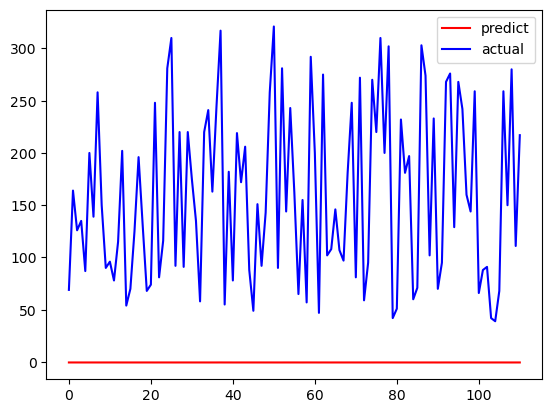

In [118]:
##TODO## Optionally, plot the predicted vs actual values
plt.plot(Y_pred_mlp2, color= 'red', label= 'predict')
plt.plot(Ytest2, color= 'blue', label= 'actual')
plt.legend()
plt.show()

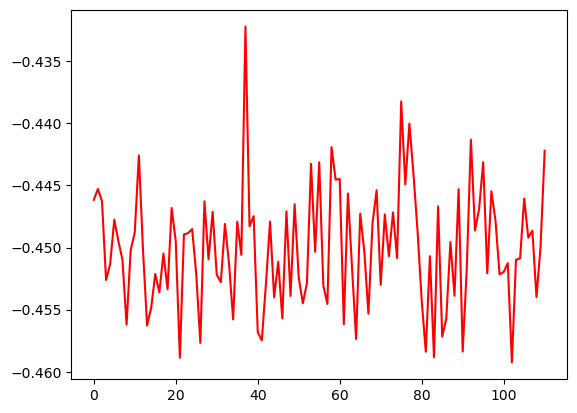

In [119]:
plt.plot(Y_pred_mlp2, color= 'red', label= 'predict')

##  Part (g) Optional 
Plot the loss curve (progression of the loss during training)
Access the model's loss curve to visualise the progression of the loss during training.
- Use the `loss_curve_` attribute of the trained model to retrieve the loss values for each iteration.

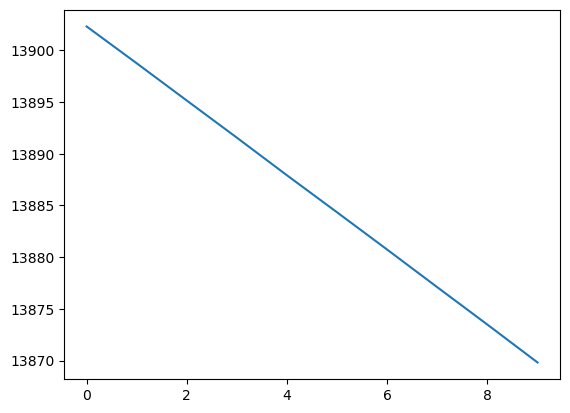

In [106]:
# Plot the loss curve (progression of the loss during training)
##TODO##

plt.plot(mlp_regression.loss_curve_)

# Extra
Grid Search
Investigate GridSearchCV from sklearn.model_selection for optimising the parameters of neural network. Apply it to both MLP classification and regression tasks using the following grid of parameters

In [107]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],  # Number of neurons per layer
    'activation': ['relu', 'logistic'],  # Activation functions
    'learning_rate_init': [0.001, 0.01, 0.1]  # Learning rate
}

In [103]:
##TODO##

#Classification
grid_search1 = ##TODO##

#Regression
grid_search2 = ##TODO##



SyntaxError: invalid syntax (116338336.py, line 4)